## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [27]:
# your code here
data = pd.read_csv("https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv", sep=",")

#### Первые пять строк таблицы

In [3]:
data.head(10)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
5,no checking account,10,all credits at this bank paid back duly,others,2241,unknown/no savings account,< 1 yr,>= 35,male : married/widowed,none,...,unknown / no property,48,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
6,no checking account,8,all credits at this bank paid back duly,others,3398,unknown/no savings account,4 <= ... < 7 yrs,>= 35,male : married/widowed,none,...,unknown / no property,39,none,rent,2-3,unskilled - resident,0 to 2,no,yes,good
7,no checking account,6,all credits at this bank paid back duly,others,1361,unknown/no savings account,< 1 yr,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,40,none,rent,1,unskilled - resident,3 or more,no,yes,good
8,... >= 200 DM / salary for at least 1 year,18,all credits at this bank paid back duly,furniture/equipment,1098,unknown/no savings account,unemployed,< 20,female : non-single or male : single,none,...,building soc. savings agr./life insurance,65,none,rent,2-3,unemployed/unskilled - non-resident,0 to 2,no,no,good
9,... < 0 DM,24,no credits taken/all credits paid back duly,furniture/equipment,3758,100 <= ... < 500 DM,unemployed,>= 35,female : non-single or male : single,none,...,real estate,23,none,for free,1,unemployed/unskilled - non-resident,0 to 2,no,no,good


#### Последние пять строк таблицы

In [4]:
data.tail(5)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


#### Информация о таблице

In [5]:
print("Number of rows: {0}, number of columns: {1}\nNumber of elements in the Data Frame: {2}".format(data.shape[0], data.shape[1], data.size))

Number of rows: 1000, number of columns: 21
Number of elements in the Data Frame: 21000


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

#### Определяем, есть ли пропуски в данных

In [6]:
print("Is there any NaN in the data set: {0}".format("YES" if(data.isnull().values.any()) else "NO"))

Is there any NaN in the data set: NO


### Разделяем признаки на количественные, бинарные, порядковые и категориальные

#### Бинарные признаки

In [7]:
# если брать утверждение - любой признак бинарный, если принимает два занчения data[filter(lambda x: len(data[x].unique()) == 2, data.columns)]
# также следует отметить, что признак people_liable может быть рассмотрен и как бинарный и как порядковый
data[['people_liable', 'telephone', 'foreign_worker', 'credit_risk']]

,people_liable,telephone,foreign_worker,credit_risk
0,0 to 2,no,no,good
1,3 or more,no,no,good
2,0 to 2,no,no,good
3,3 or more,no,yes,good
4,0 to 2,no,yes,good
...,...,...,...,...
995,3 or more,no,no,bad
996,0 to 2,no,no,bad
997,0 to 2,yes (under customer name),no,bad
998,0 to 2,yes (under customer name),no,bad


#### Категориальные признаки

In [8]:
#некоторое неупорядоченное множество, значения которого можно сравнивать только на равенство, но не по принципу "больше-меньше" и т.д.
data[['status','credit_history', 'purpose', 'personal_status_sex',
    'other_debtors', 'property', 'other_installment_plans', 'housing']]

,status,credit_history,purpose,personal_status_sex,other_debtors,property,other_installment_plans,housing
0,no checking account,all credits at this bank paid back duly,car (used),female : non-single or male : single,none,car or other,none,for free
1,no checking account,all credits at this bank paid back duly,others,male : married/widowed,none,unknown / no property,none,for free
2,... < 0 DM,no credits taken/all credits paid back duly,retraining,female : non-single or male : single,none,unknown / no property,none,for free
3,no checking account,all credits at this bank paid back duly,others,male : married/widowed,none,unknown / no property,none,for free
4,no checking account,all credits at this bank paid back duly,others,male : married/widowed,none,car or other,bank,rent
...,...,...,...,...,...,...,...,...
995,no checking account,no credits taken/all credits paid back duly,furniture/equipment,male : married/widowed,none,unknown / no property,none,for free
996,no checking account,no credits taken/all credits paid back duly,others,male : married/widowed,co-applicant,unknown / no property,none,rent
997,... >= 200 DM / salary for at least 1 year,all credits at this bank paid back duly,others,male : married/widowed,none,real estate,none,own
998,... < 0 DM,no credits taken/all credits paid back duly,furniture/equipment,male : married/widowed,none,real estate,none,rent


#### Порядковые

In [9]:
#некоторое упорядоченное множество
data[['duration', 'amount', 'savings', 'employment_duration', 'installment_rate', 'age', 'number_credits', 'job']]

,duration,amount,savings,employment_duration,installment_rate,age,number_credits,job
0,18,1049,unknown/no savings account,< 1 yr,< 20,21,1,skilled employee/official
1,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,36,2-3,skilled employee/official
2,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,23,1,unskilled - resident
3,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,39,2-3,unskilled - resident
4,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,38,2-3,unskilled - resident
...,...,...,...,...,...,...,...,...
995,24,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,21,1,unskilled - resident
996,24,2303,unknown/no savings account,>= 7 yrs,< 20,45,1,skilled employee/official
997,21,12680,... >= 1000 DM,>= 7 yrs,< 20,30,1,manager/self-empl./highly qualif. employee
998,12,6468,... >= 1000 DM,unemployed,25 <= ... < 35,52,1,manager/self-empl./highly qualif. employee


#### Количественные

In [10]:
# когда среднее что-то значит и определены арифметические операции
data[['duration', 'amount', 'age']]

,duration,amount,age
0,18,1049,21
1,9,2799,36
2,12,841,23
3,12,2122,39
4,12,2171,38
...,...,...,...
995,24,1987,21
996,24,2303,45
997,21,12680,30
998,12,6468,52


### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [11]:
data.groupby("purpose")['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

### Процент клиентов моложе 30 лет, которые снимают жилье

In [12]:
((data['age'] < 30) & (data['housing'] == 'rent')).mean()

0.246

### Процент клиентов старше 40 лет, снимающий жилье

In [13]:
((data['age'] > 40) & (data['housing'] == 'rent')).mean()

0.185

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [14]:
data[(data['foreign_worker'] == 'yes') & (data['number_credits'] != '1') & (data['number_credits'] != '2-3')].shape[0]

1

### Задание 6 (1 балл)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

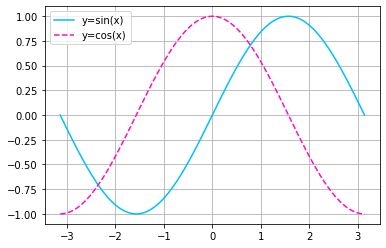

In [16]:
x = np.linspace(-np.pi,np.pi,num=100)
y = np.sin(x)
z = np.cos(x)
plt.plot(x,y,color='#00bfff',label="y=sin(x)")
plt.plot(x,z,color='#fc0fc0',linestyle='--', label="y=cos(x)")
plt.legend(loc = 'upper left')
plt.grid()

plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

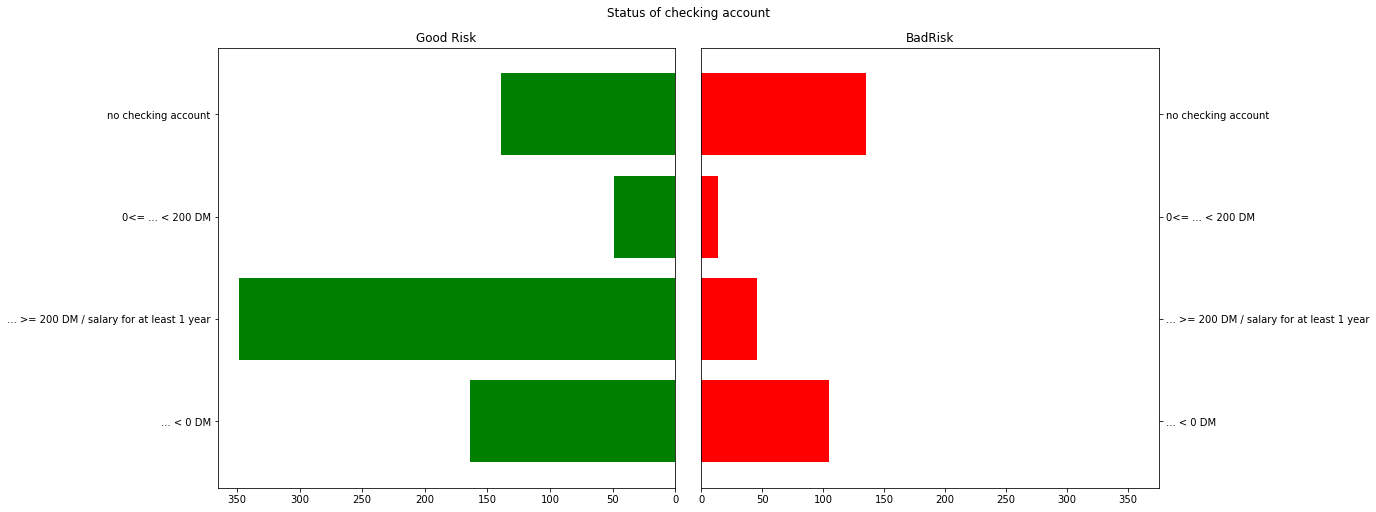

In [17]:
goodStats = data[(data['credit_risk'] == 'good')]['status'].value_counts(sort=False).sort_index()
badStats = data[(data['credit_risk'] == 'bad')]['status'].value_counts(sort=False).sort_index()


figure, (ax1, ax2) = plt.subplots(figsize=(19,7), ncols = 2,constrained_layout=True)
figure.suptitle('Status of checking account')

goodStats.plot(ax=ax1, kind='barh',title='Good Risk',width=0.8, color='g')
ax1.invert_xaxis()

badStats.plot(ax=ax2, kind='barh',title='BadRisk', width=0.8, color='r')
ax2.set_xlim([0,375])
ax2.yaxis.tick_right()

plt.show()




### Задание 8  (0.5 балла)

In [18]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

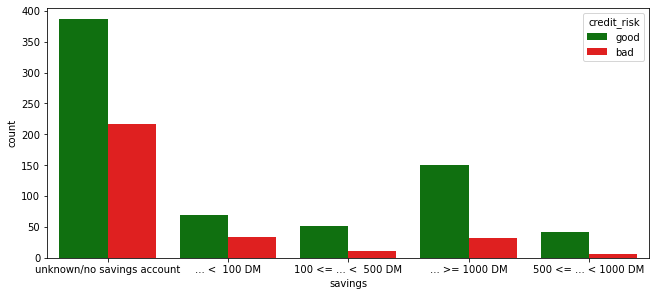

In [19]:
figure, ax = plt.subplots(figsize=(9,4),constrained_layout=True)
sns.countplot(ax=ax, x='savings', hue='credit_risk', data=data, palette=['green','red'])
plt.show()

#### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

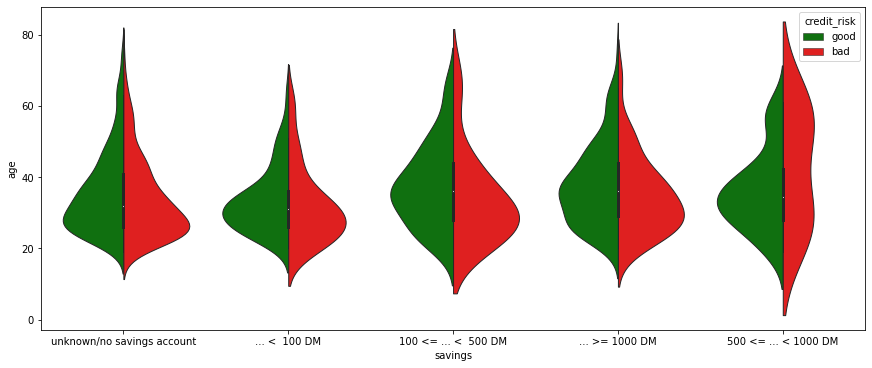

In [20]:
figure, ax = plt.subplots(figsize=(12,5),constrained_layout=True)
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk",
               split=True, linewidth=1,palette=['green','red']
               )
plt.show()

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

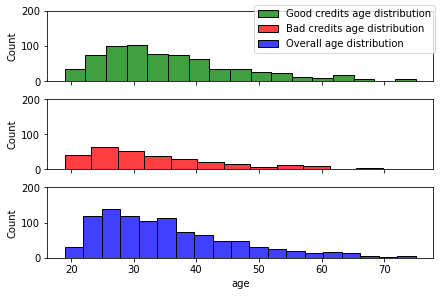

In [21]:
figure, ax = plt.subplots(3,1,constrained_layout=True,sharex=True)

onlyGood = data[data['credit_risk'] == 'good']
onlyBad = data[data['credit_risk'] == 'bad']

ax[0].set_ylim([0,200])
ax[1].set_ylim([0,200])
ax[2].set_ylim([0,200])

sns.histplot(data=onlyGood, x='age',ax=ax[0],color='g')
sns.histplot(data=onlyBad, x='age',ax=ax[1],color='r')
sns.histplot(data=data, x='age',ax=ax[2],color='b')
figure.legend(labels=('Good credits age distribution', 'Bad credits age distribution','Overall age distribution'))

plt.show()

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

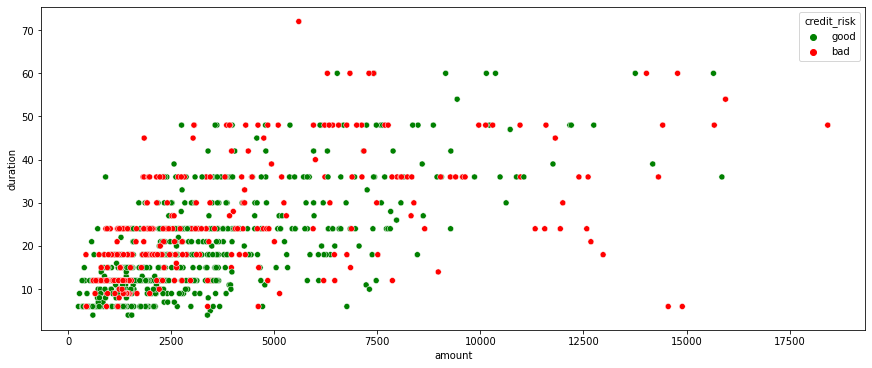

In [22]:
figure, ax = plt.subplots(figsize=(12,5),constrained_layout=True)
sns.scatterplot(
    data=data,
    x="amount", y="duration",
    hue='credit_risk',
    palette=['green','red'],
    ax=ax
)
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

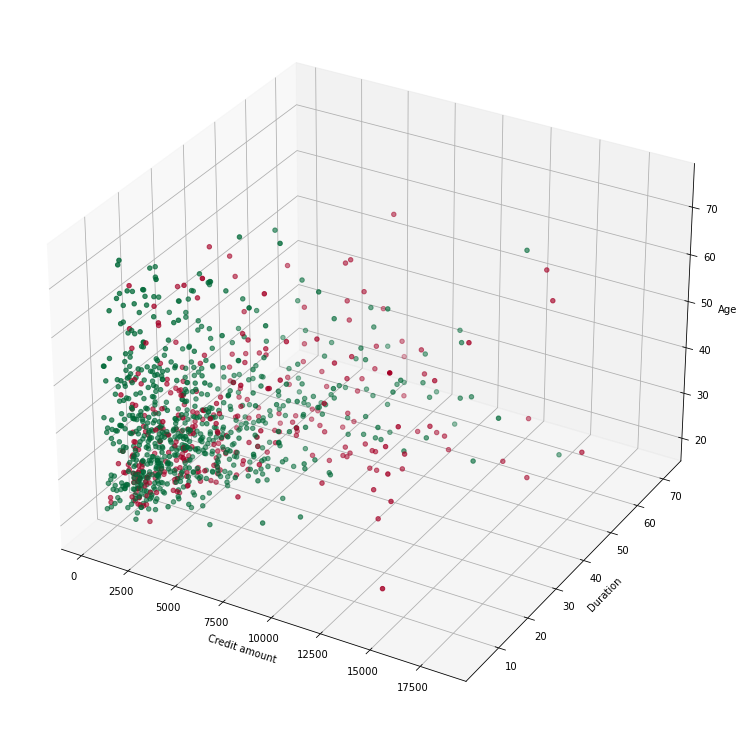

In [23]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)

x = data['amount']
y = data['duration']
z = data['age']

ax.scatter(x, y, z,c=(data['credit_risk']=='good'), cmap='RdYlGn')
ax.set_zlabel("Age")
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")

plt.show()

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [28]:
# в данном случае people_liable рассматриваю как бинарный/можно было бы применить .get_dummies, но было бы слишком много лишних столбцов
data['credit_risk'] = data['credit_risk'].apply(lambda row: 1 if row == 'good' else 0)
data = data.drop(['status', 'purpose', 'personal_status_sex',
    'other_debtors', 'property', 'other_installment_plans', 'housing'], 1)
data = pd.get_dummies(data)
data.head(10)

,duration,amount,age,credit_risk,credit_history_all credits at this bank paid back duly,credit_history_critical account/other credits elsewhere,credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/all credits paid back duly,savings_... < 100 DM,...,job_manager/self-empl./highly qualif. employee,job_skilled employee/official,job_unemployed/unskilled - non-resident,job_unskilled - resident,people_liable_0 to 2,people_liable_3 or more,telephone_no,telephone_yes (under customer name),foreign_worker_no,foreign_worker_yes
0,18,1049,21,1,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1,9,2799,36,1,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
2,12,841,23,1,0,0,0,0,1,1,...,0,0,0,1,1,0,1,0,1,0
3,12,2122,39,1,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
4,12,2171,38,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
5,10,2241,48,1,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
6,8,3398,39,1,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
7,6,1361,40,1,1,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,1
8,18,1098,65,1,1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
9,24,3758,23,1,0,0,0,0,1,0,...,0,0,1,0,1,0,1,0,1,0


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [29]:

weights = np.array([-0.01, 0, -0.01, 0.15, 0.1, -0.1,  -0.05, 0.1, -0.1, 0.25,
                    0.2,  0.23, -0.1, 0.1, 0.15, -0.05, 0.25,-0.05, 0.2, 0.22,
                    0.15, 0.3, 0.15, 0.2, 0.07, 0.24, -0.1,-0.15,-0.2, -0.3,
                    0.25,0.2, 0.1, 0.1, 0.2, 0.25, -0.05, 0.15, 0.25, -0.15]).transpose()
def convert(number):
    return 1 if number >= 0.5 else 0
def predict(Xtest: np.array) -> np.array:
    Xtest = Xtest.dot(weights)
    return(np.array(list(map(convert, Xtest))))


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
accuracy_score(y_test, predict(X_test))

0.604